## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col = 'Timestamp',
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col = 'Timestamp',
    parse_dates=True,
    infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna().copy()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "", regex=False)

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# not dropping duplicates because data is a timeseries
bitstamp.duplicated

<bound method DataFrame.duplicated of                          Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13681.04  13681.04  13637.93  13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00  13620.00    1.069665   
...                       ...       ...       ...       ...         ...   
2018-03-31 23:55:00   6935.01   6939.07   6922.56   6922.56    1.044354   
2018-03-31 23:56:00   6922.02   6922.02   6918.00   6920.32    3.069539   
2018-03-31 23:57:00   6920.33   6936.42   6920.33   6934.72   28.239049   
2018-03-31 23:58:00   6927.65   6929.42   6927.65   6927.65    0.839507   
2018-03-31 23:59:00   6929.98   6929.98   6928.00   6928.01   

In [10]:
# Check data for null values
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
# Confirm data types are consistent
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# For coinbase dataframe drop all NaN values 
coinbase = coinbase.dropna().copy()

In [13]:
# Use the str.replace function to remove the dollar sign, $
coinbase["Close"] = coinbase["Close"].str.replace("$", "", regex=False)

In [14]:
# Convert the Close data type to a float
coinbase["Close"] = coinbase["Close"].astype("float")

In [15]:
# Review the data for duplicate values, and drop them if necessary
# not dropping duplicates because data is a timeseries
coinbase.duplicated

<bound method DataFrame.duplicated of                          Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13620.00  13620.00  13608.49  13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00  13580.00   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  13583.44    9.955364   
...                       ...       ...       ...       ...         ...   
2018-03-31 23:55:00   6945.20   6948.06   6930.00   6930.00    5.802288   
2018-03-31 23:56:00   6930.00   6930.01   6930.00   6930.01    0.625053   
2018-03-31 23:57:00   6930.01   6933.91   6930.01   6933.91    0.776431   
2018-03-31 23:58:00   6933.91   6938.00   6933.90   6937.31    0.133413   
2018-03-31 23:59:00   6937.30   6937.30   6931.09   6934.00   

In [16]:
# Check data for null values
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [17]:
# Confirm data types are consistent
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ["Close"]]
bitstamp_sliced['Bitstamp Closing Price'] = bitstamp_sliced.Close
bitstamp_sliced = bitstamp_sliced.drop(columns='Close')

# Review the first five rows of the DataFrame
bitstamp_sliced

,Bitstamp Closing Price
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00
...,...
2018-03-31 23:55:00,6922.56
2018-03-31 23:56:00,6920.32
2018-03-31 23:57:00,6934.72


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ['Close']]
coinbase_sliced['Coinbase Closing Price'] = coinbase_sliced.Close
coinbase_sliced = coinbase_sliced.drop(columns='Close')


# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Coinbase Closing Price
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [20]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Bitstamp Closing Price
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [21]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Coinbase Closing Price
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

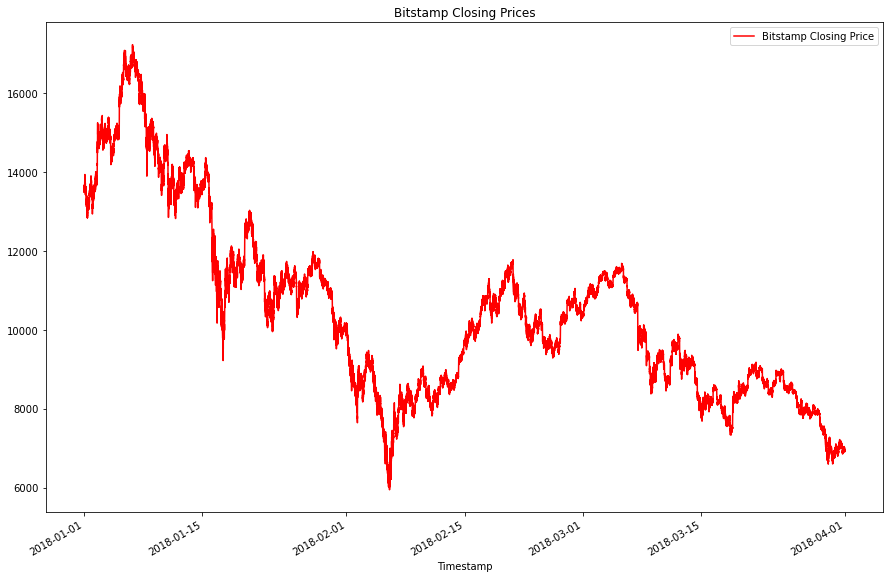

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15,10), color='red', title='Bitstamp Closing Prices')

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

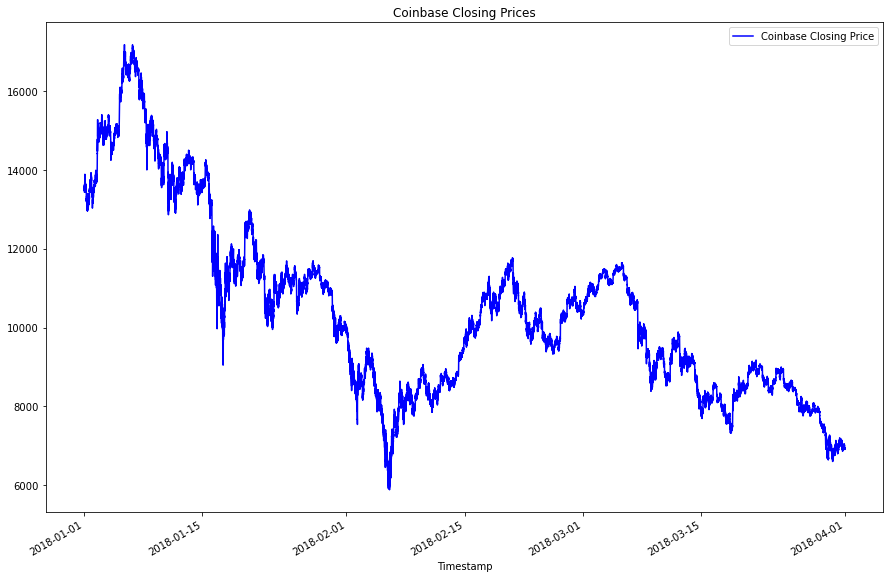

In [23]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15,10), color='blue', title='Coinbase Closing Prices')

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

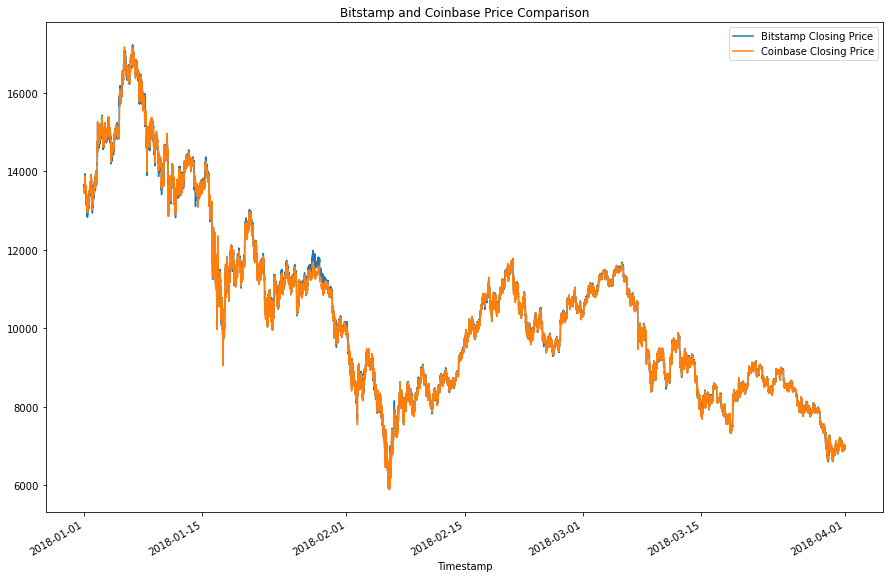

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.plot(ax=ax)

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

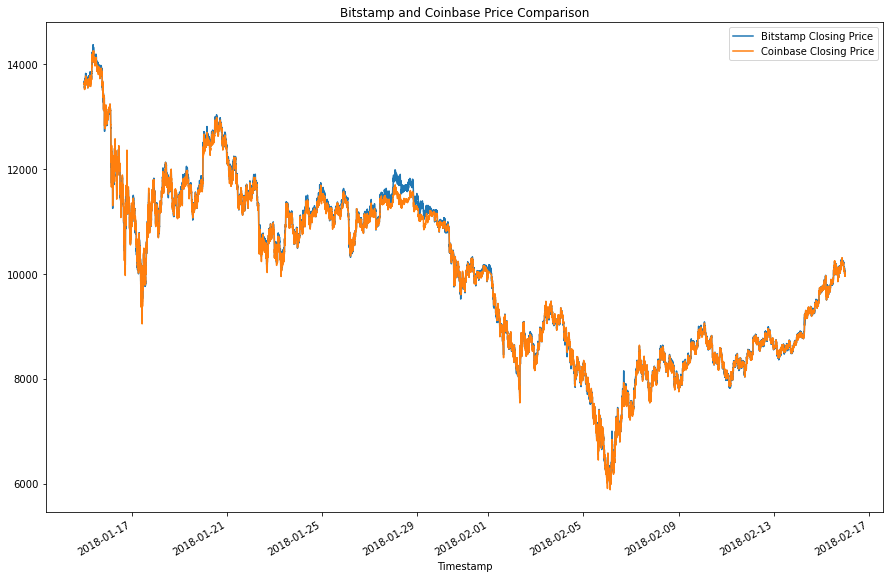

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.loc['2018-01-15' : '2018-02-15'].plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.loc['2018-01-15' : '2018-02-15'].plot(ax=ax)

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

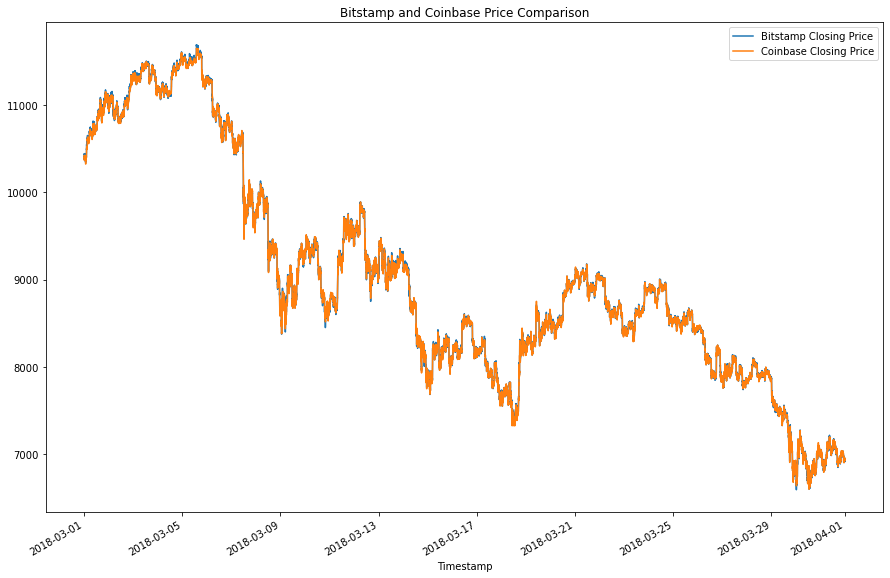

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = bitstamp_sliced.loc['2018-03-01' : '2018-04-01'].plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.loc['2018-03-01' : '2018-04-01'].plot(ax=ax)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

In [27]:
# It appears that the spread change has lessened over time. 

In [28]:
new_df = pd.concat([coinbase_sliced, bitstamp_sliced], axis='columns', join='inner')
new_df['Arbitrage Spread'] = new_df['Coinbase Closing Price'] - new_df['Bitstamp Closing Price']
new_df.loc['2018-01-04 00:00:00' : '2018-01-04 23:59:00']

,Coinbase Closing Price,Bitstamp Closing Price,Arbitrage Spread
Timestamp,,,
2018-01-04 00:00:00,14986.77,14947.40,39.37
2018-01-04 00:01:00,14980.01,14937.94,42.07
2018-01-04 00:02:00,14995.00,14970.00,25.00
2018-01-04 00:03:00,14963.64,14905.96,57.68
2018-01-04 00:04:00,14960.00,14861.68,98.32
...,...,...,...
2018-01-04 23:55:00,14890.01,14922.65,-32.64
2018-01-04 23:56:00,14905.79,14944.54,-38.75
2018-01-04 23:57:00,14933.88,14910.27,23.61


### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

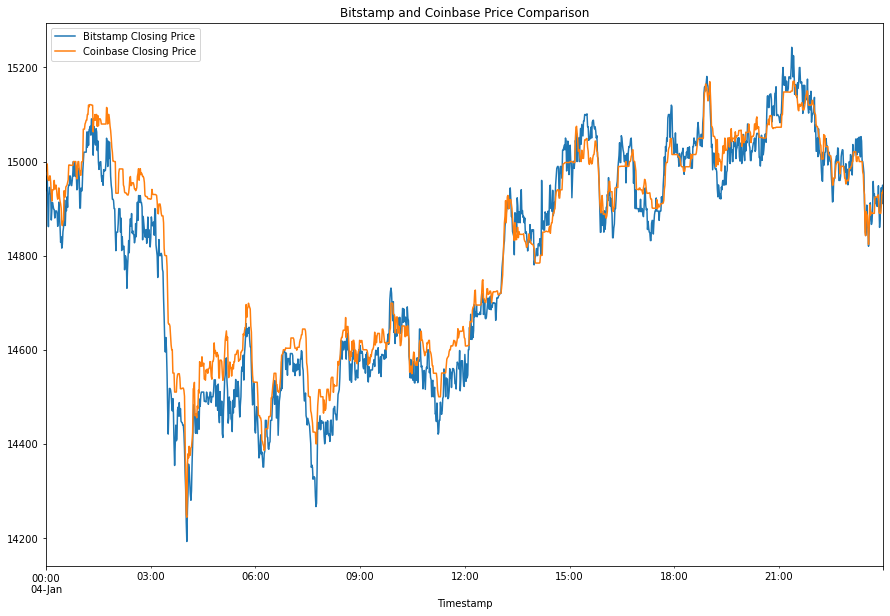

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-01-04 00:00:00' : '2018-01-04 23:59:00'].plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.loc['2018-01-04 00:00:00' : '2018-01-04 23:59:00'].plot(ax=ax)

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = (coinbase_sliced['Coinbase Closing Price'].loc['2018-01-04']-
                          bitstamp_sliced['Bitstamp Closing Price'].loc['2018-01-04'])

# Generate summary statistics 
arbitrage_spread_early.describe()

count    1440.00000
mean       28.73225
std        50.00892
min      -159.12000
25%        -6.50500
50%        29.64500
75%        59.96750
max       240.00000
dtype: float64

<AxesSubplot:>

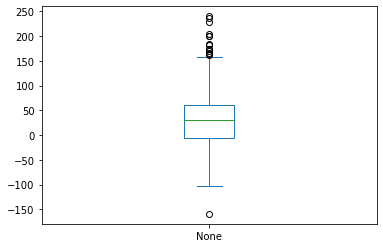

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

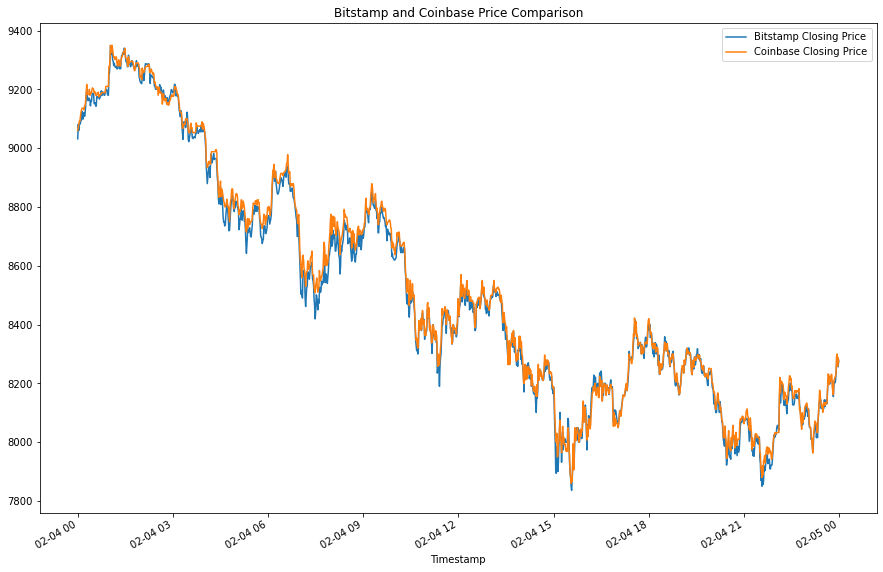

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-02-04' : '2018-02-04'].plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.loc['2018-02-04' : '2018-02-04'].plot(ax=ax)

In [33]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = (coinbase_sliced['Coinbase Closing Price'].loc['2018-02-04']-
                          bitstamp_sliced['Bitstamp Closing Price'].loc['2018-02-04'])

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1438.000000
mean       16.183561
std        21.376198
min       -47.890000
25%         1.882500
50%        15.785000
75%        28.662500
max       142.520000
dtype: float64

<AxesSubplot:>

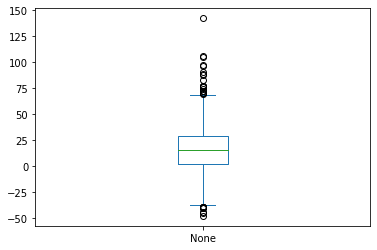

In [34]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp and Coinbase Price Comparison'}, xlabel='Timestamp'>

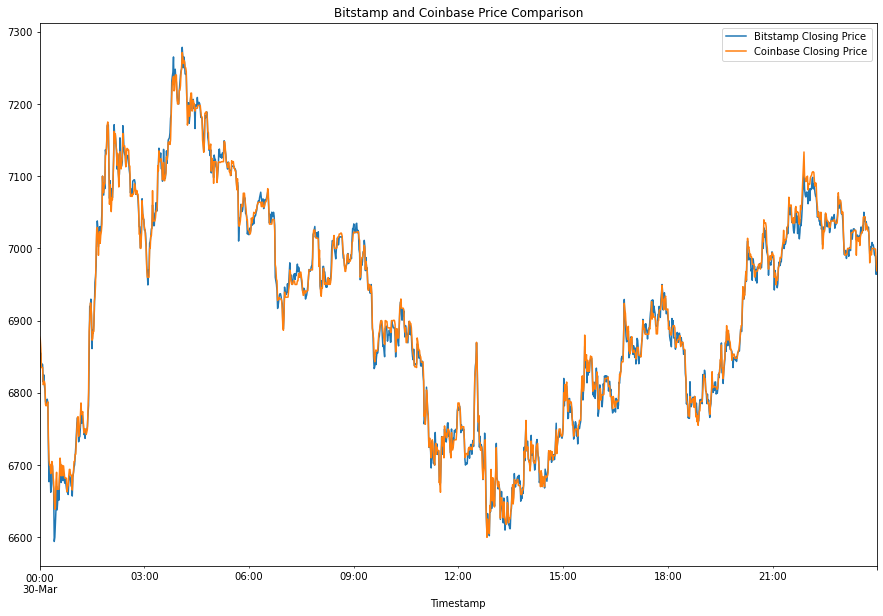

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-03-30' : '2018-03-30'].plot(
    legend=True,
    figsize=(15,10),
    title='Bitstamp and Coinbase Price Comparison'
)
coinbase_sliced.loc['2018-03-30' : '2018-03-30'].plot(ax=ax)

In [36]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = (coinbase_sliced['Coinbase Closing Price'].loc['2018-03-30']-
                          bitstamp_sliced['Bitstamp Closing Price'].loc['2018-03-30'])

# Generate summary statistics 
arbitrage_spread_late.describe()

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
dtype: float64

<AxesSubplot:>

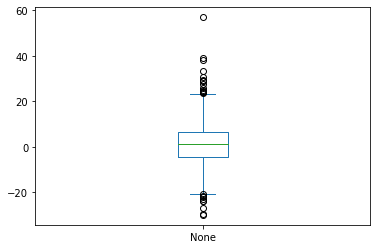

In [37]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [47]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced on
arbitrage_spread_early = (coinbase_sliced['Coinbase Closing Price'].loc['2018-01-04']-
                          bitstamp_sliced['Bitstamp Closing Price'].loc['2018-01-04'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    1024.000000
mean       52.519609
std        36.932341
min         0.010000
25%        24.825000
50%        46.505000
75%        71.810000
max       240.000000
dtype: float64

In [39]:
# Measure the arbitrage spread only when it is > 0
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]

#Summary stats when spread is greater than 0 for middle date
arbitrage_spread_middle.describe()

count    1122.000000
mean       23.829456
std        17.131967
min         0.040000
25%        10.945000
50%        21.040000
75%        32.650000
max       142.520000
dtype: float64

In [40]:
# Measure the arbitrage spread only when it is > 0
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]

#Summary stats when spread is greater than 0 for late date
arbitrage_spread_late.describe()

count    797.000000
mean       7.538846
std        6.265063
min        0.010000
25%        2.780000
50%        6.060000
75%       10.570000
max       56.920000
dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [67]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= (arbitrage_spread_early[arbitrage_spread_early > 0] /
                        bitstamp_sliced['Bitstamp Closing Price'].loc['2018-01-04'])
# Review the spread return DataFrame
spread_return_early = spread_return_early.dropna().copy()
spread_return_early

Timestamp
2018-01-04 00:00:00    0.002634
2018-01-04 00:01:00    0.002816
2018-01-04 00:02:00    0.001670
2018-01-04 00:03:00    0.003870
2018-01-04 00:04:00    0.006616
                         ...   
2018-01-04 23:49:00    0.001329
2018-01-04 23:50:00    0.000988
2018-01-04 23:53:00    0.002015
2018-01-04 23:54:00    0.000742
2018-01-04 23:57:00    0.001583
Length: 1024, dtype: float64

In [66]:
# For the date midway in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = (arbitrage_spread_middle[arbitrage_spread_middle > 0] / 
                        bitstamp_sliced['Bitstamp Closing Price'].loc['2018-02-04'])

# Review the spread return DataFrame
spread_return_middle = spread_return_middle.dropna().copy()
spread_return_middle

Timestamp
2018-02-04 00:00:00    0.003109
2018-02-04 00:02:00    0.002166
2018-02-04 00:03:00    0.001590
2018-02-04 00:04:00    0.000880
2018-02-04 00:05:00    0.002408
                         ...   
2018-02-04 23:53:00    0.002208
2018-02-04 23:54:00    0.000118
2018-02-04 23:55:00    0.002702
2018-02-04 23:56:00    0.000416
2018-02-04 23:58:00    0.003747
Length: 1122, dtype: float64

In [65]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = (arbitrage_spread_late[arbitrage_spread_late > 0] / 
                        bitstamp_sliced['Bitstamp Closing Price'].loc['2018-03-30'])

# Review the spread return DataFrame
spread_return_late = spread_return_late.dropna().copy()
spread_return_late

Timestamp
2018-03-30 00:00:00    0.002529
2018-03-30 00:01:00    0.002637
2018-03-30 00:02:00    0.000792
2018-03-30 00:08:00    0.000714
2018-03-30 00:09:00    0.001279
                         ...   
2018-03-30 23:46:00    0.000576
2018-03-30 23:55:00    0.001190
2018-03-30 23:56:00    0.001289
2018-03-30 23:57:00    0.001362
2018-03-30 23:58:00    0.002868
Length: 797, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [68]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-04 01:59:00    0.010101
2018-01-04 02:10:00    0.011711
2018-01-04 02:12:00    0.011509
2018-01-04 02:15:00    0.011171
2018-01-04 02:19:00    0.013534
dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [70]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    21.000000
mean      0.012226
std       0.002038
min       0.010004
25%       0.010639
50%       0.011509
75%       0.013534
max       0.016580
dtype: float64

In [73]:
#Do the same for the date in the middle of the dataset
profitable_trades_mid = spread_return_middle[spread_return_middle > .01]
profitable_trades_mid.describe()

count    8.000000
mean     0.012206
std      0.002204
min      0.010373
25%      0.010573
50%      0.011319
75%      0.013327
max      0.016786
dtype: float64

In [72]:
# Do the same for the late date 
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [ ]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE